In [35]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from skimpy import skim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [36]:
df=pd.read_csv("data.txt", sep=",")

<Axes: >

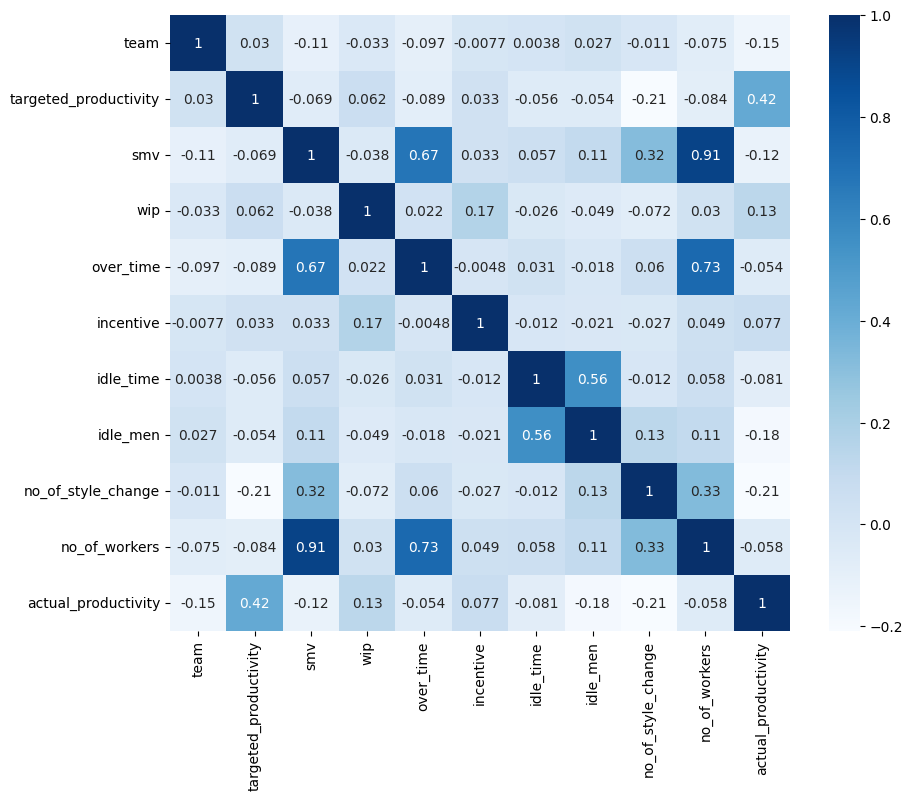

In [37]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues", annot=True)

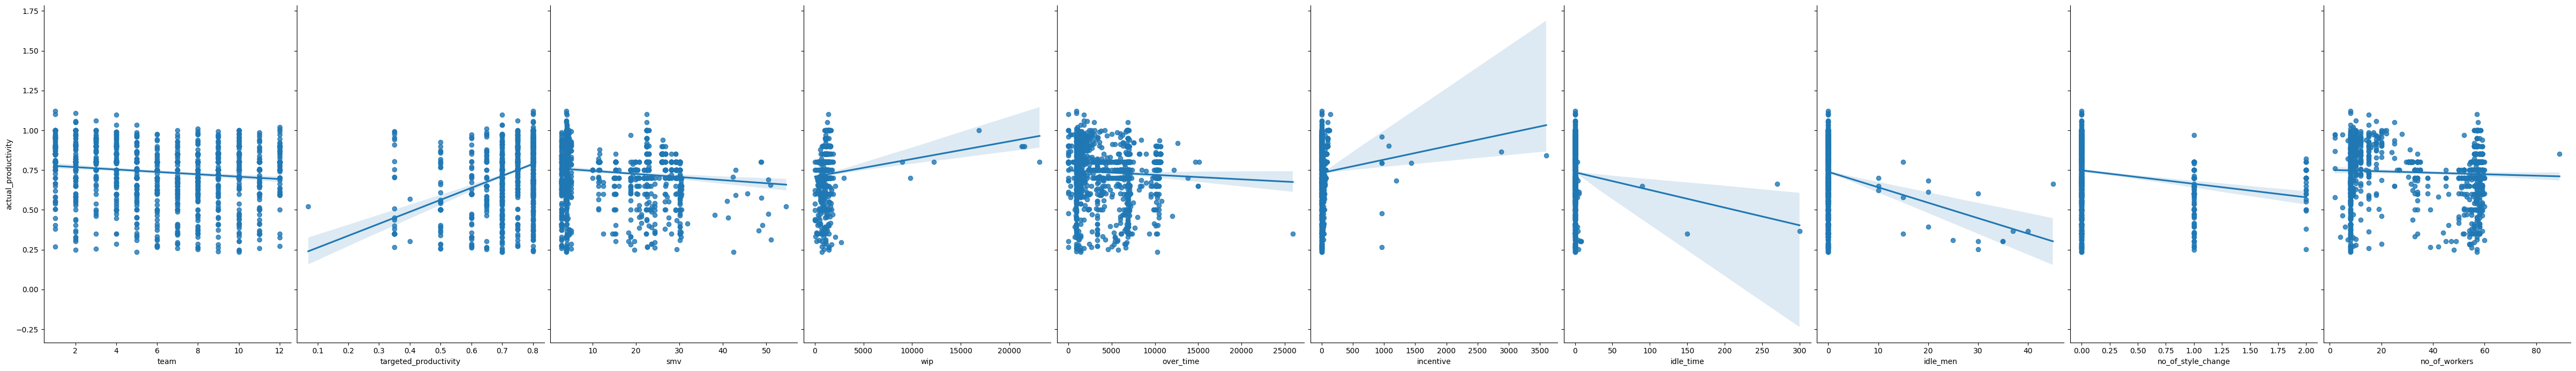

In [38]:
x_vars_numeric = df.select_dtypes(include=[np.number]).drop(['actual_productivity'], axis=1).columns

sns.pairplot(df, x_vars=x_vars_numeric, y_vars='actual_productivity', height=7, aspect=0.7, kind='reg')


In [39]:
X = df_numeric.drop(['actual_productivity'], axis=1)  # Características
y = df_numeric['actual_productivity']  # Variable objetivo

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestRegressor(random_state=42)

In [42]:
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [43]:

y_pred = model.predict(X_test)
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)


In [44]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.09829153926813884
MSE:  0.01825720120443628
RMSE:  0.135119211085753


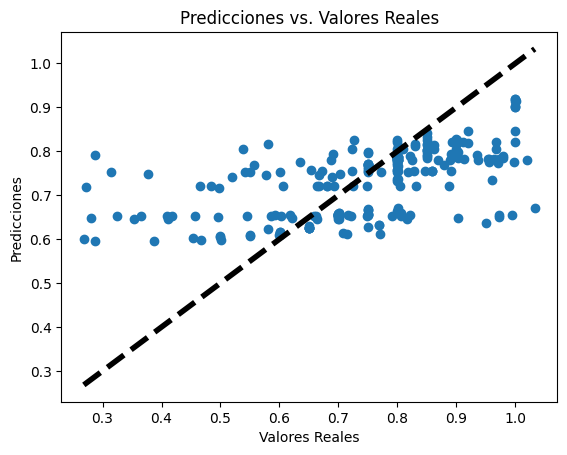

In [45]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


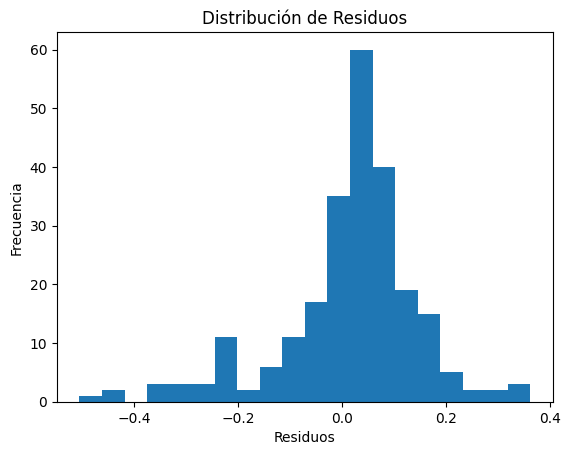

In [46]:
residuos = y_test - y_pred
plt.hist(residuos, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.show()


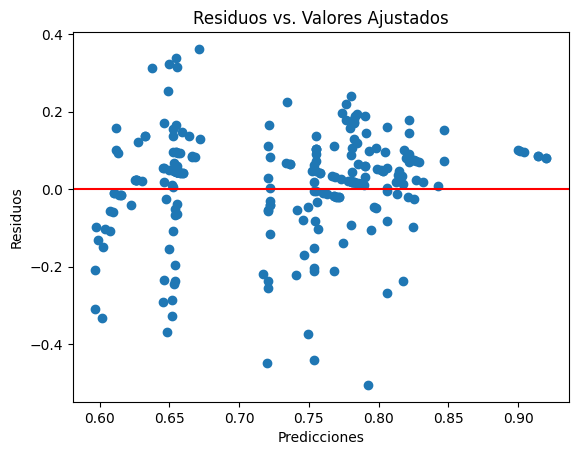

In [47]:
plt.scatter(y_pred, residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Ajustados')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Asumiendo que X e y ya están definidos con tus datos
# Inicializar el modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Usar validación cruzada para calcular el MSE
scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores a MSE positivos
mse_scores = -scores

print("MSE scores por cada pliegue: ", mse_scores)
print("Promedio MSE: ", np.mean(mse_scores))


MSE scores por cada pliegue:  [0.01436369 0.02722679 0.02455743 0.02731412 0.02139127]
Promedio MSE:  0.022970661020702644


In [49]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

[0.1198486  0.16500544 0.15670812 0.16526985 0.14625753]
0.1506179079438612


# Modelo con KNN

In [50]:
# Preparar los datos seleccionando las columnas relevantes y añadiendo 'wip'
columns_to_use = ['smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity', 'wip']
data_for_imputation = df[columns_to_use]

# Normalizar los datos
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_for_imputation.drop(columns=['wip'])), columns=data_for_imputation.columns[:-1])

# Añadir la columna 'wip' nuevamente para la imputación
data_normalized['wip'] = data_for_imputation['wip']

# Aplicar KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
data_imputed = knn_imputer.fit_transform(data_normalized)

# Convertir los datos imputados de nuevo a un DataFrame y desnormalizar los datos imputados (excepto 'wip' que fue imputado directamente)
data_imputed_df = pd.DataFrame(data_imputed, columns=data_normalized.columns)
data_imputed_df.iloc[:, :-1] = scaler.inverse_transform(data_imputed_df.iloc[:, :-1])

In [51]:
df_numeric1 = data_imputed_df.select_dtypes(include=[np.number])

In [52]:
X1 = df_numeric1.drop(['actual_productivity'], axis=1)  # Características
y1 = df_numeric1['actual_productivity']  # Variable objetivo

In [53]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [54]:
model1 = RandomForestRegressor(random_state=42)

In [55]:
model1.fit(X_train1, y_train1)

RandomForestRegressor(random_state=42)

In [56]:

y_pred1 = model1.predict(X_test1)
MAE1 = metrics.mean_absolute_error(y_test1, y_pred1)

# mean squared error
MSE1 = metrics.mean_squared_error(y_test1, y_pred1)

# root mean squared error
RMSE1 = np.sqrt(MSE1)


In [57]:
print("MAE KNN: ", MAE1)
print("MSE KNN: ", MSE1)
print("RMSE KNN: ", RMSE1)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE KNN:  0.05005257957536949
MSE KNN:  0.005845789644206832
RMSE KNN:  0.07645776379287346
MAE:  0.09829153926813884
MSE:  0.01825720120443628
RMSE:  0.135119211085753


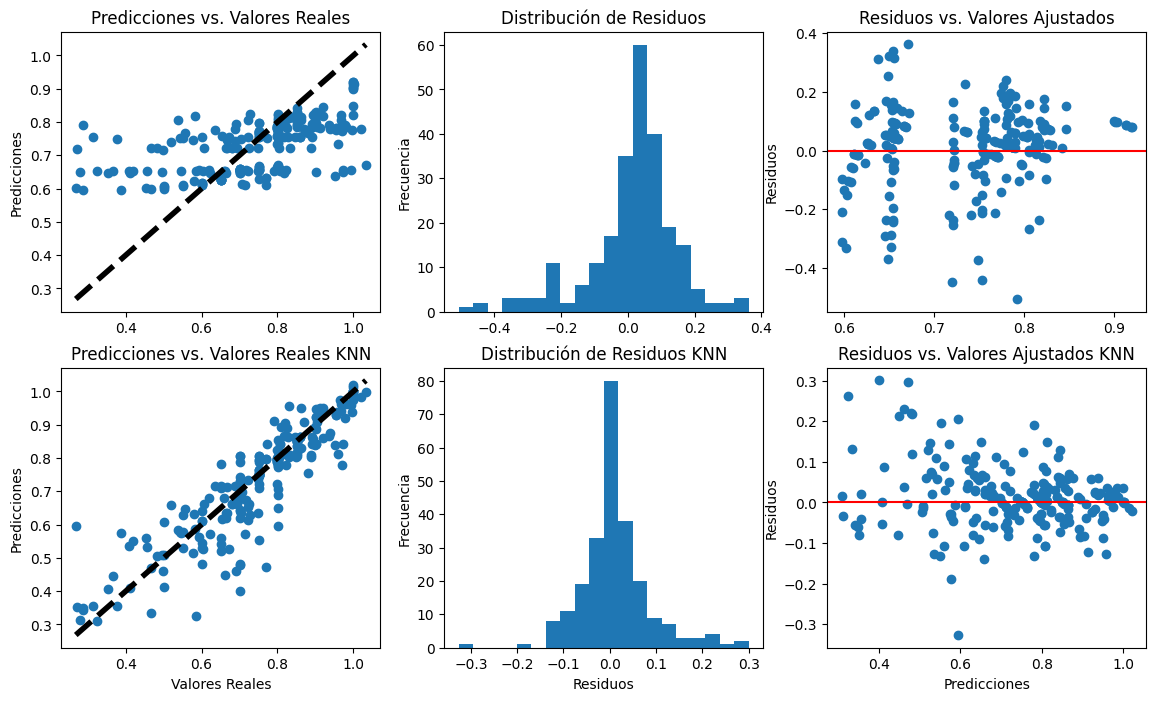

In [67]:
residuos = y_test - y_pred
residuos1 = y_test1 - y_pred1

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Primer modelo
axs[0, 0].scatter(y_test, y_pred)
axs[0, 0].set_ylabel('Predicciones')
axs[0, 0].set_title('Predicciones vs. Valores Reales')
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

axs[0, 1].hist(residuos, bins=20)
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].set_title('Distribución de Residuos')

axs[0, 2].scatter(y_pred, residuos)
axs[0, 2].set_ylabel('Residuos')
axs[0, 2].set_title('Residuos vs. Valores Ajustados')
axs[0, 2].axhline(y=0, color='r', linestyle='-')

# Segundo modelo
axs[1, 0].scatter(y_test1, y_pred1)
axs[1, 0].set_xlabel('Valores Reales')
axs[1, 0].set_ylabel('Predicciones')
axs[1, 0].set_title('Predicciones vs. Valores Reales KNN')
axs[1, 0].plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)

axs[1, 1].hist(residuos1, bins=20)
axs[1, 1].set_xlabel('Residuos')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].set_title('Distribución de Residuos KNN')

axs[1, 2].scatter(y_pred1, residuos1)
axs[1, 2].set_xlabel('Predicciones')
axs[1, 2].set_ylabel('Residuos')
axs[1, 2].set_title('Residuos vs. Valores Ajustados KNN')
axs[1, 2].axhline(y=0, color='r', linestyle='-')

